Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "XAVIER MALTAS TARRIDAS"
COLLABORATORS = "OSCAR BUISAN VINIEGRA"

---

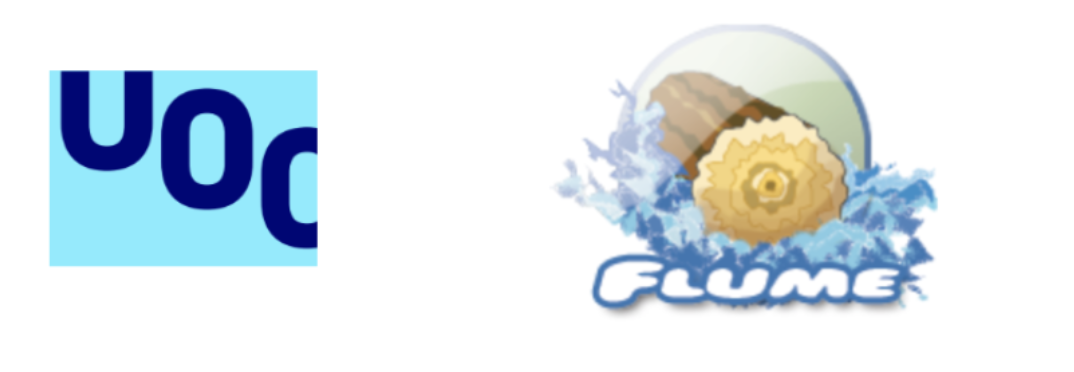

# Activitat: Captura i emmagatzematge: Flume
## (Puntuació: 30% de l'Activitat 5)

**Nota**
En alguns dels exercicis s'hauran de fer **captures de pantalla que justifiquin les respostes**. Les captures de pantalla es poden fer amb les eines del sistema operatiu que estigueu utilitzant. Per copiar la imatge al porta-retalls podeu utilitzar diferents mètodes: "Eina de Talls" en Windows, "Imprimir pantalla", Ctrl+C en seleccionar una imatge, etc... Les imatges un cop capturades es poden enganxar directament a les cel·les de resposta, mitjançant Ctrl+V o amb el menú contextual que apareix amb el botó dret del ratolí, la qual cosa enganxarà la imatge que estigui al porta-retalls. Per veure la imatge, s'ha d'executar la cel·la.

## 1. Introducció

En aquesta activitat explorarem una de les tecnologies natives de recopilació de dades a l'entorn Hadoop: Apache Flume. En la següent part de la pràctica també treballarem amb Kafka. Ambdues tecnologies permeten capturar fluxos de dades en temps real així com processar informació en el procés de captura de manera senzilla. Durant els següents exercicis, com a fonts de dades, utilitzarem Mastodon.

Per realitzar aquest exercici, el primer que heu de fer és descomprimir a la vostra carpeta del servidor Cloudera el fitxer que acompanya a aquesta activitat.

In [ ]:
import zipfile
import os

print(os.getcwd())


# Specify the path to the ZIP file
zip_file_path = 'actividad_5.zip'

# Specify the directory where you want to extract the contents
extracted_folder_path = os.getcwd()

# Ensure the parent directory exists
os.makedirs(os.path.dirname(extracted_folder_path), exist_ok=True)

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extracted_folder_path)

# Print a message indicating successful extraction
print("ZIP file '{}' has been successfully extracted to '{}'.".format(zip_file_path, extracted_folder_path))


# 2. Captura d'informació en streaming mitjançant Flume

## 2.1. Introducció
En aquesta pràctica haureu de realitzar una sèrie d'activitats que, de manera incremental, us ensenyaran unes metodologies i eines amb l'objectiu de construir una infraestructura per a la recopilació i anàlisi de l'stream de la xarxa social de Mastodon en temps real.

[Mastodon](https://joinmastodon.org/) és un programari lliure desenvolupat per implementar xarxes socials amb una gran semblança a Twitter, essent llançada juntament amb el seu domini principal [mastodon.social](https://mastodon.social/explore) a l'octubre de 2016. La principal diferència rau en què hi ha diversos servidors de Mastodon, i que podem crear el nostre propi. Entre ells, la seva comunicació es tracta d'una manera federada.

## 2.2 Registre a la API

En els següents exemples farem crides a [l'API v2 de Mastodon](https://docs.joinmastodon.org/api/) i aquesta ens demanarà que li subministrem les nostres claus de desenvolupador o un Bearer Token. En aquest cas, treballarem amb el Bearer Token que heu generat.

## 2.3 Autenticació OAUTH2 a Mastodon
Les API de Mastodon permeten treballar amb enormes quantitats de dades i la forma que aquestes tinguin garanties de qualitat i siguin segures per als desenvolupadors i usuaris és a través de l'autenticació. Existeixen diversos mètodes d'autenticació, OAuth 1.0a, OAuth 2.0 Bearer Token i autenticació Bàsica.

En el nostre cas, utilitzarem OAuth 2.0 Bearer Token, ja que permet que una aplicació de desenvolupador de Mastodon tingui accés a la informació disponible públicament a Mastodon.

**[POST oauth2/token](https://developer.twitter.com/en/docs/basics/authentication/api-reference/token)**
 permet que una aplicació registrada obtingui un token de portador OAuth 2, que es pot utilitzar per fer sol·licituds d'API en nom d'una aplicació, sense un context d'usuari. Això s'anomena autenticació només d'aplicació. Les respostes a les crides inclouen una estructura JSON que descriu el token de portador concedit.
 
Abans de poder utilitzar l'API de Mastodon, heu de registrar la vostra aplicació (la qual cosa us proporcionarà una clau de client i un secret de client) i després iniciar sessió (la qual cosa us proporcionarà un token d'accés) i desar-lo (tingueu en compte que cada vegada que el guardeu, es revoca el token d'accés amb el qual heu iniciat sessió). Podeu crear un compte en un servidor propi que disposem a [eimtbigd-masto.techlab.uoc.edu](https://eimtbigd-masto.techlab.uoc.edu). No obstant això, si ho preferiu, podeu utilitzar un altre servidor de Mastodon, com ara el domini principal de [Mastodon.social](https://mastodon.social).

En qualsevol cas, el primer que heu de fer és crear una aplicació. A les figures següents es mostra com crear una aplicació associada al vostre compte a la secció de preferències i a l'opció de desenvolupament.

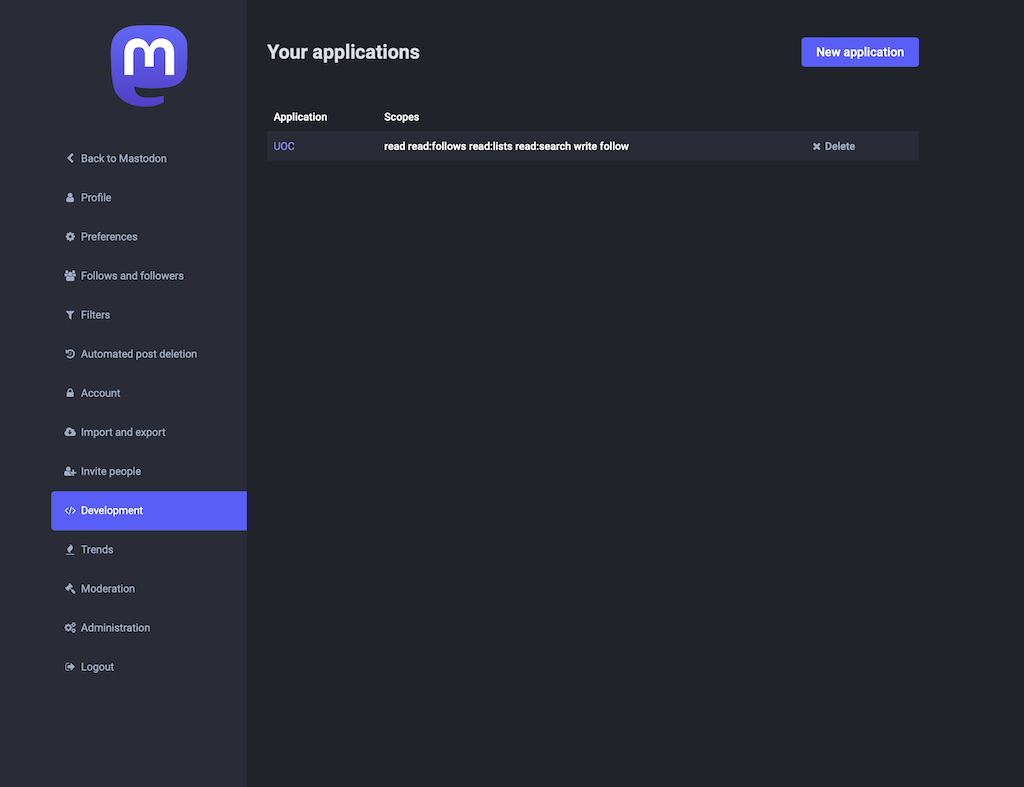

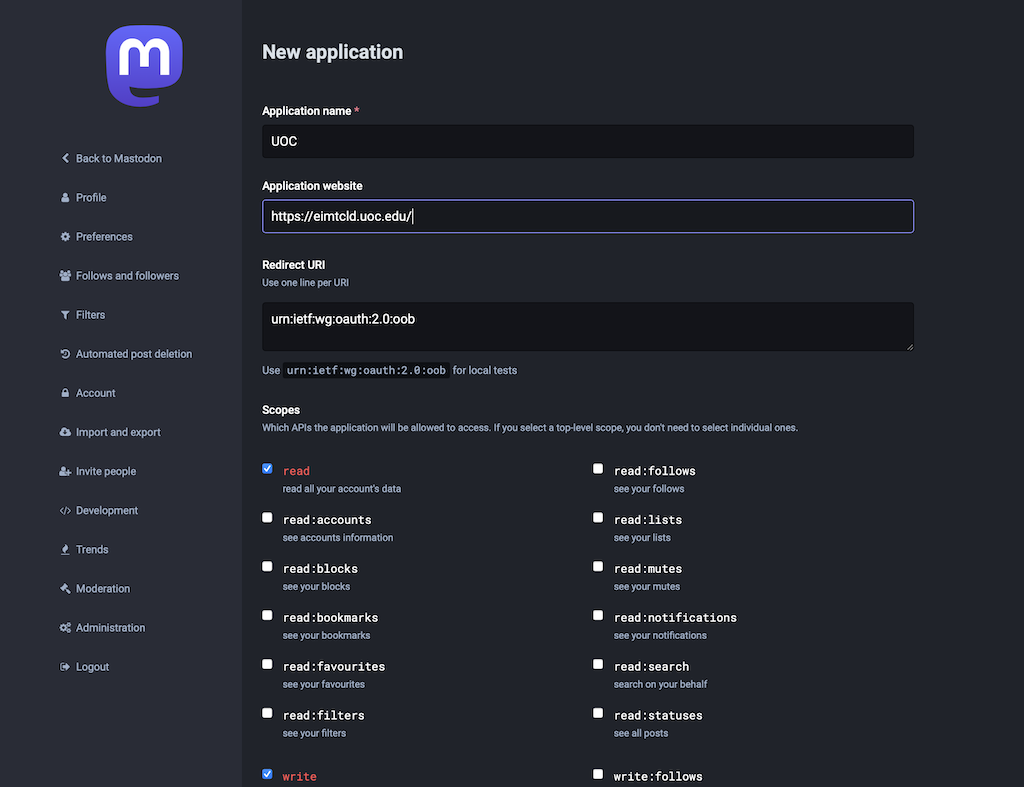

Figura 1. Creació d'una aplicació de Mastodon

Finalment, podreu obtenir una identificació de client, un secret i un token d'accés. A la figura 3 es mostren ocultes les credencials d'accés.

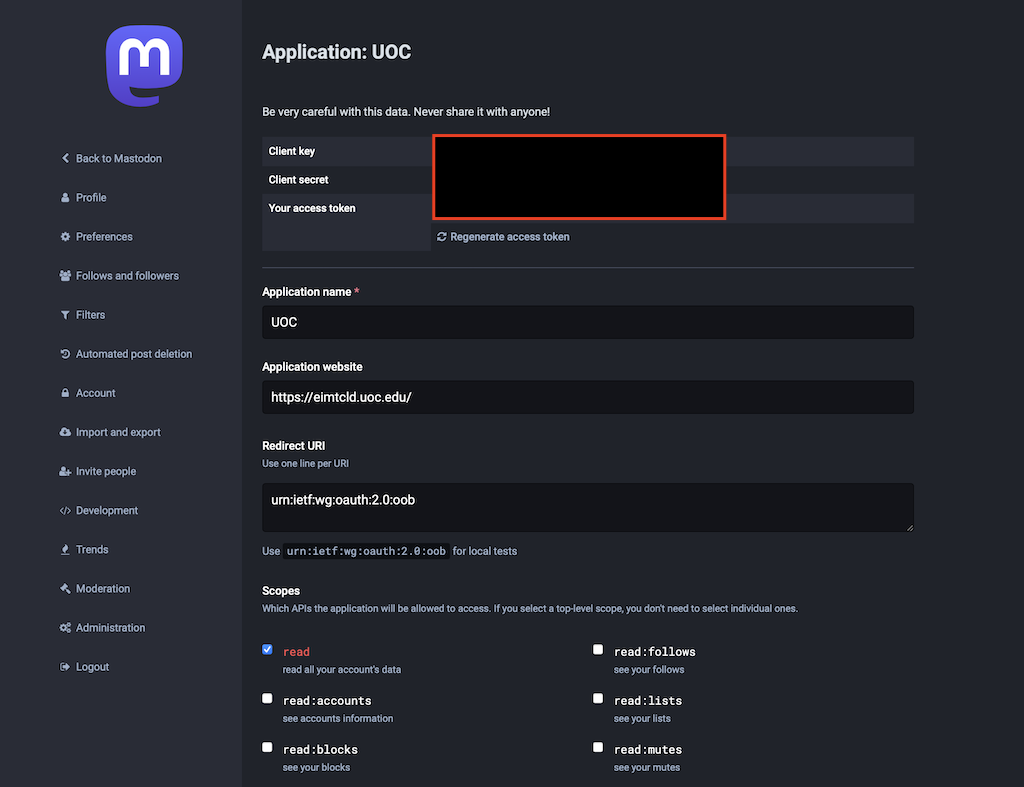

Figura 2. Consulta de les credencials d'accés de l'aplicació

En aquest exemple crearem un "toot" (un missatge) a Mastodon, per fer-ho heu d'utilitzar el vostre 'access token'.

In [ ]:
import warnings
from cryptography.hazmat.backends import default_backend

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#captura de los posts from mastodon asociados a vuestro usuario
#<FILL IN> debe contener vuestra access token

from mastodon import Mastodon
from pprint import pprint

my_access_token='BNzHT7-XN8r9KMnEX0SLtXsNSoMyCH7b8aRgqrdlBhU'

api = Mastodon(access_token=my_access_token, api_base_url="https://mastodon.social")

resultat = api.toot("Test post via API usando OAuth")
pprint (resultat)
#END <FILL IN>

Podem obtenir els estats, els més recents primer. La línia de temps pot ser `home`, `local`, `public`, `tag/hashtag` o `list/id`. La línia de temps predeterminada és la línia de temps `home`. En concret mostrarem el contingut de l'últim missatge del nostre home.

In [ ]:
import json

resultats = api.timeline()
json_str = json.dumps(resultats,indent=4,sort_keys=True, default=str)
#json con toda la información de los posts
#pprint(json_str)
json_object = json.loads(json_str)
pprint(json_object[0]['created_at']+json_object[0]['content'])

I finalment, anem a recuperar tots els "toots" relacionats amb el hashtag `war`, limitant la sortida a 5.

In [ ]:
# Busqueda por hashtag
hashtag = 'war'
resultats = api.timeline_hashtag('war', limit=5)

# iteración sobre los toots
for toot in resultats:
    contenido = toot['content']
    print(contenido)

### 2.2. Apache Flume
En aquesta activitat introduirem el funcionament dels agents d'Apache Flume. Aquests agents proporcionen una manera molt eficient i versàtil de capturar i organitzar fluxos de dades a l'entorn de Hadoop i Spark. Per definir un agent, heu de definir tres components:
- Source: Defineix el tipus i el mode d'entrada de les dades. Per exemple, des de la web.
- Channel: Defineix com es comuniquen les dades amb les seves destinacions. Podria ser per memòria, per fitxer, etc.
- Sink: És la destinació final de les dades: hdfs, memòria, spark, etc.

Un agent ha de tenir com a mínim un de cada un d'aquests components. A la Figura 3 podeu veure un exemple clàssic d'agent Flume. És important que reviseu la [documentació de Flume](https://flume.apache.org/releases/content/1.9.0/FlumeUserGuide.html#flume-channels) abans de començar amb la realització de l'activitat. 

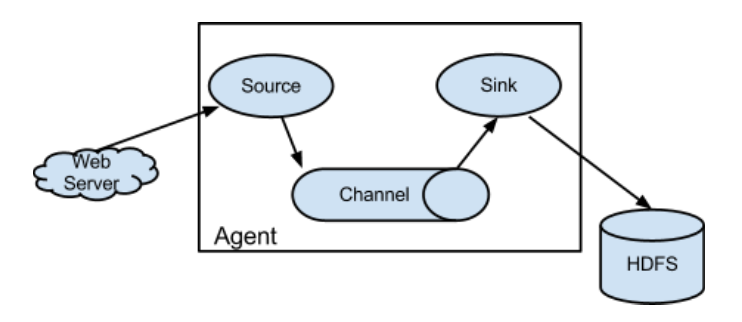
<br>
Figura 3: Estructura d'execució d'un procés de Flume que adquireix dades de la web i les guarda en directoris HDFS.

**Pregunta 1. (1 punt)** En aquest exercici capturarem cadenes escrites pel terminal i les enviarem a Flume per veure-les en **mode registre** (encara no les emmagatzemarem a HDFS). Per enviar i rebre els missatges en temps real, heu de posar en marxa primer el programa run.sh subministrat, mitjançant la comanda `sh run_1.sh`. Heu de completar el fitxer flume_1.conf amb la configuració correcta de l'agent Flume per capturar les cadenes que introduirem mitjançant la línia de comandes. Per fer aquest exercici és necessari tenir obertes dues sessions de terminal.

En aquesta primera part de l'activitat, veurem com enviar les paraules en streaming mitjançant un procés [netcat](https://en.wikipedia.org/wiki/Netcat). El procés netcat s'executarà en una terminal a través de SSH o VSCode i us permetrà escriure paraules, que posteriorment seran capturades.

Així doncs, en una **sessió de terminal mitjançant SSH, no mitjançant el terminal de Jupyter**, heu d'executar un netcat `$ nc localhost <port_assignat>`.

In [ ]:
#para enviar por TCP un mensaje a un puerto asignado al usuario
!nc localhost <PUERTO_ASIGNADO>
# O bien
!curl telnet://localhost:<PUERTO_ASIGNADO>

In [ ]:
# flume_1.conf
# Terminal

NetcatAgent.sources = NetcatSource
NetcatAgent.channels = MemoryChannel
NetcatAgent.sinks = LoggerSink

# Configuration for source
NetcatAgent.sources.NetcatSource.type = netcat
NetcatAgent.sources.NetcatSource.bind = localhost
NetcatAgent.sources.NetcatSource.port = 20046

# Configuration for channel
NetcatAgent.channels.MemoryChannel.type = memory
NetcatAgent.channels.MemoryChannel.capacity = 1000
NetcatAgent.channels.MemoryChannel.transactionCapacity = 100
NetcatAgent.channels.MemoryChannel.byteCapacity = 6912212

# Configuration for sink
NetcatAgent.sinks.LoggerSink.type = logger

# Connectors between components
NetcatAgent.sources.NetcatSource.channels = MemoryChannel
NetcatAgent.sinks.LoggerSink.channel = MemoryChannel

Muestra la captura de pantalla amb la sortida de l'execució de l'agent de Flume.

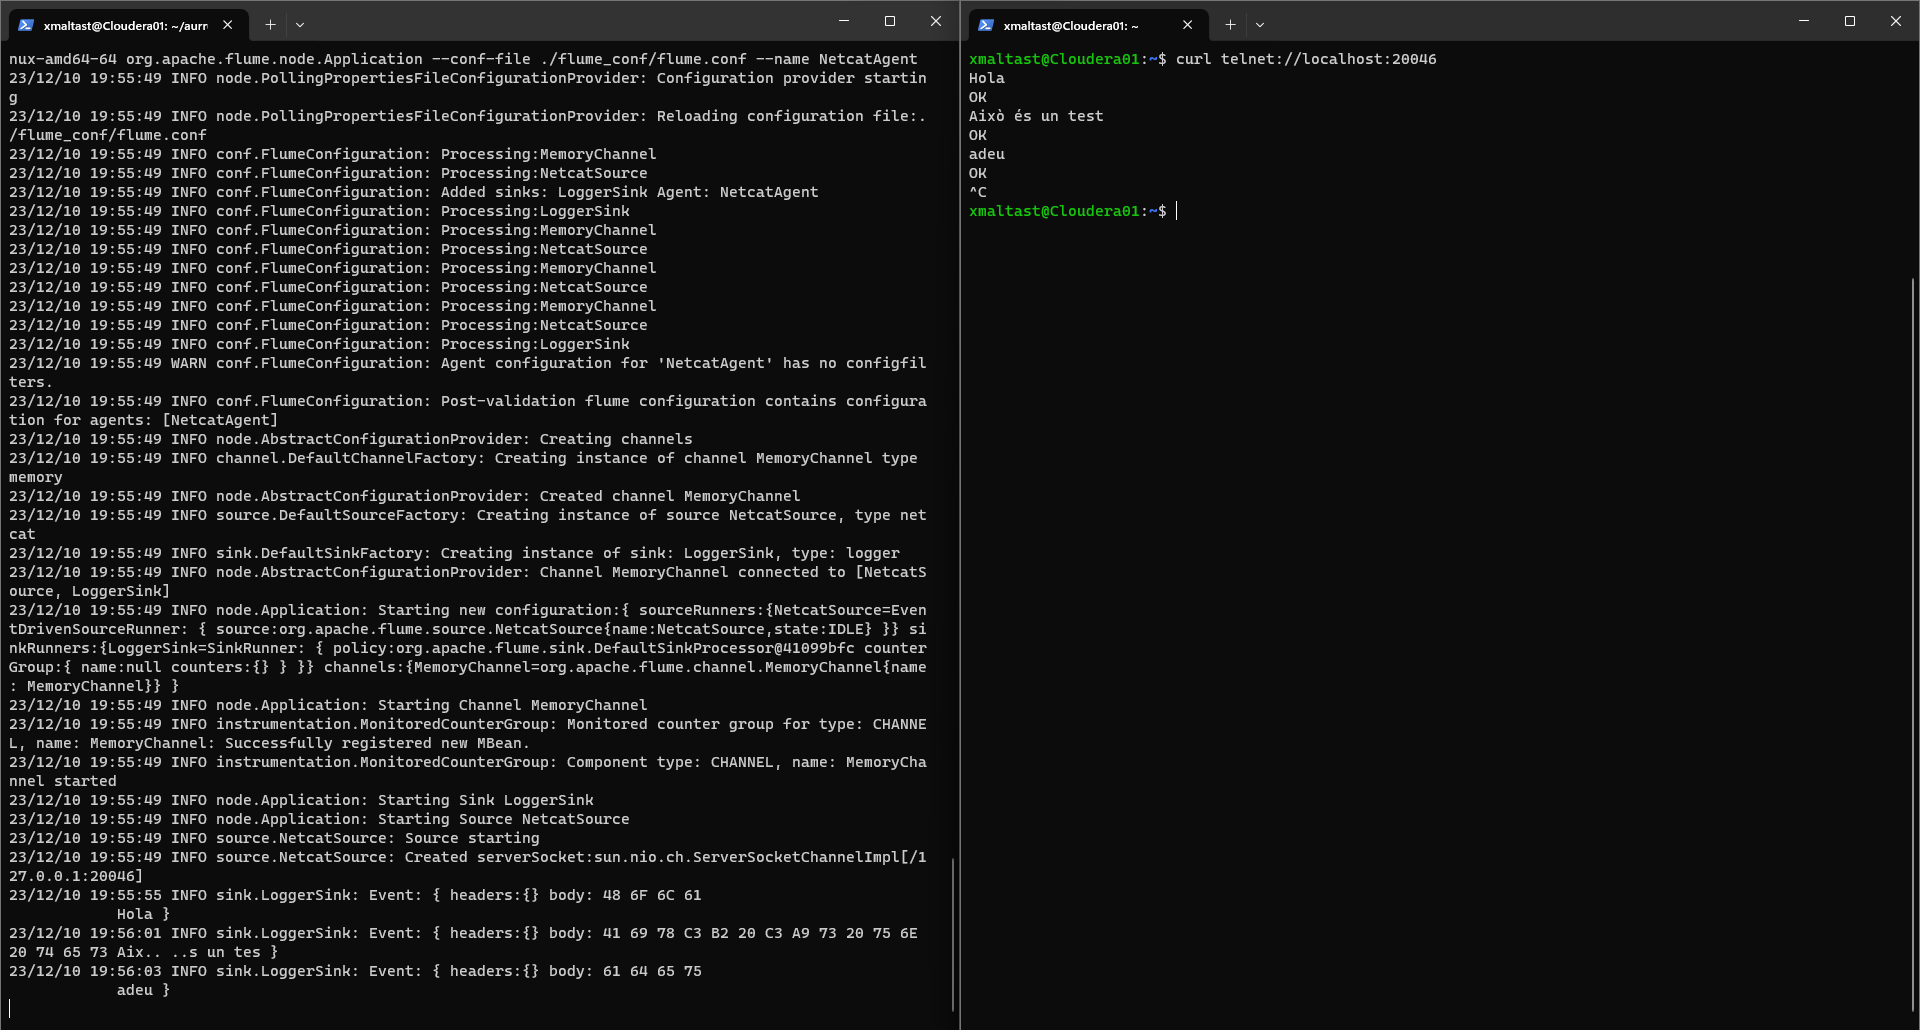

**Pregunta 2. (1 punt)** Modifica l'exercici anterior per emmagatzemar la informació a HDFS, en una carpeta anomenada mastodon al teu usuari. Els diferents "toots" s'han d'emmagatzemar en un únic fitxer de text a Flume a la carpeta `/usuari/<USUARI>/mastodon_2` a HDFS.

In [ ]:
# flume_2.conf
#HDFS

NetcatAgent.sources = NetcatSource
NetcatAgent.channels = MemoryChannel
NetcatAgent.sinks = HdfsSink

# Configuration for source
NetcatAgent.sources.NetcatSource.type = netcat
NetcatAgent.sources.NetcatSource.bind = localhost
NetcatAgent.sources.NetcatSource.port = 20046

# Configuration for channel
NetcatAgent.channels.MemoryChannel.type = memory
NetcatAgent.channels.MemoryChannel.capacity = 1000
NetcatAgent.channels.MemoryChannel.transactionCapacity = 100
NetcatAgent.channels.MemoryChannel.byteCapacity = 6912212

# Configuration for sink
NetcatAgent.sinks.HdfsSink.type = hdfs
NetcatAgent.sinks.HdfsSink.hdfs.path = hdfs://Cloudera01:8020/user/xmaltast/mastodon_2
NetcatAgent.sinks.HdfsSink.hdfs.fileType = DataStream
NetcatAgent.sinks.HdfsSink.hdfs.writeFormat = Text
NetcatAgent.sinks.HdfsSink.hdfs.batchSize = 100

# Connectors between components
NetcatAgent.sources.NetcatSource.channels = MemoryChannel
NetcatAgent.sinks.HdfsSink.channel = MemoryChannel

Mostrar la captura de pantalla amb el contingut del fitxer en HDFS resultant de l'execució de l'agent de Flume.

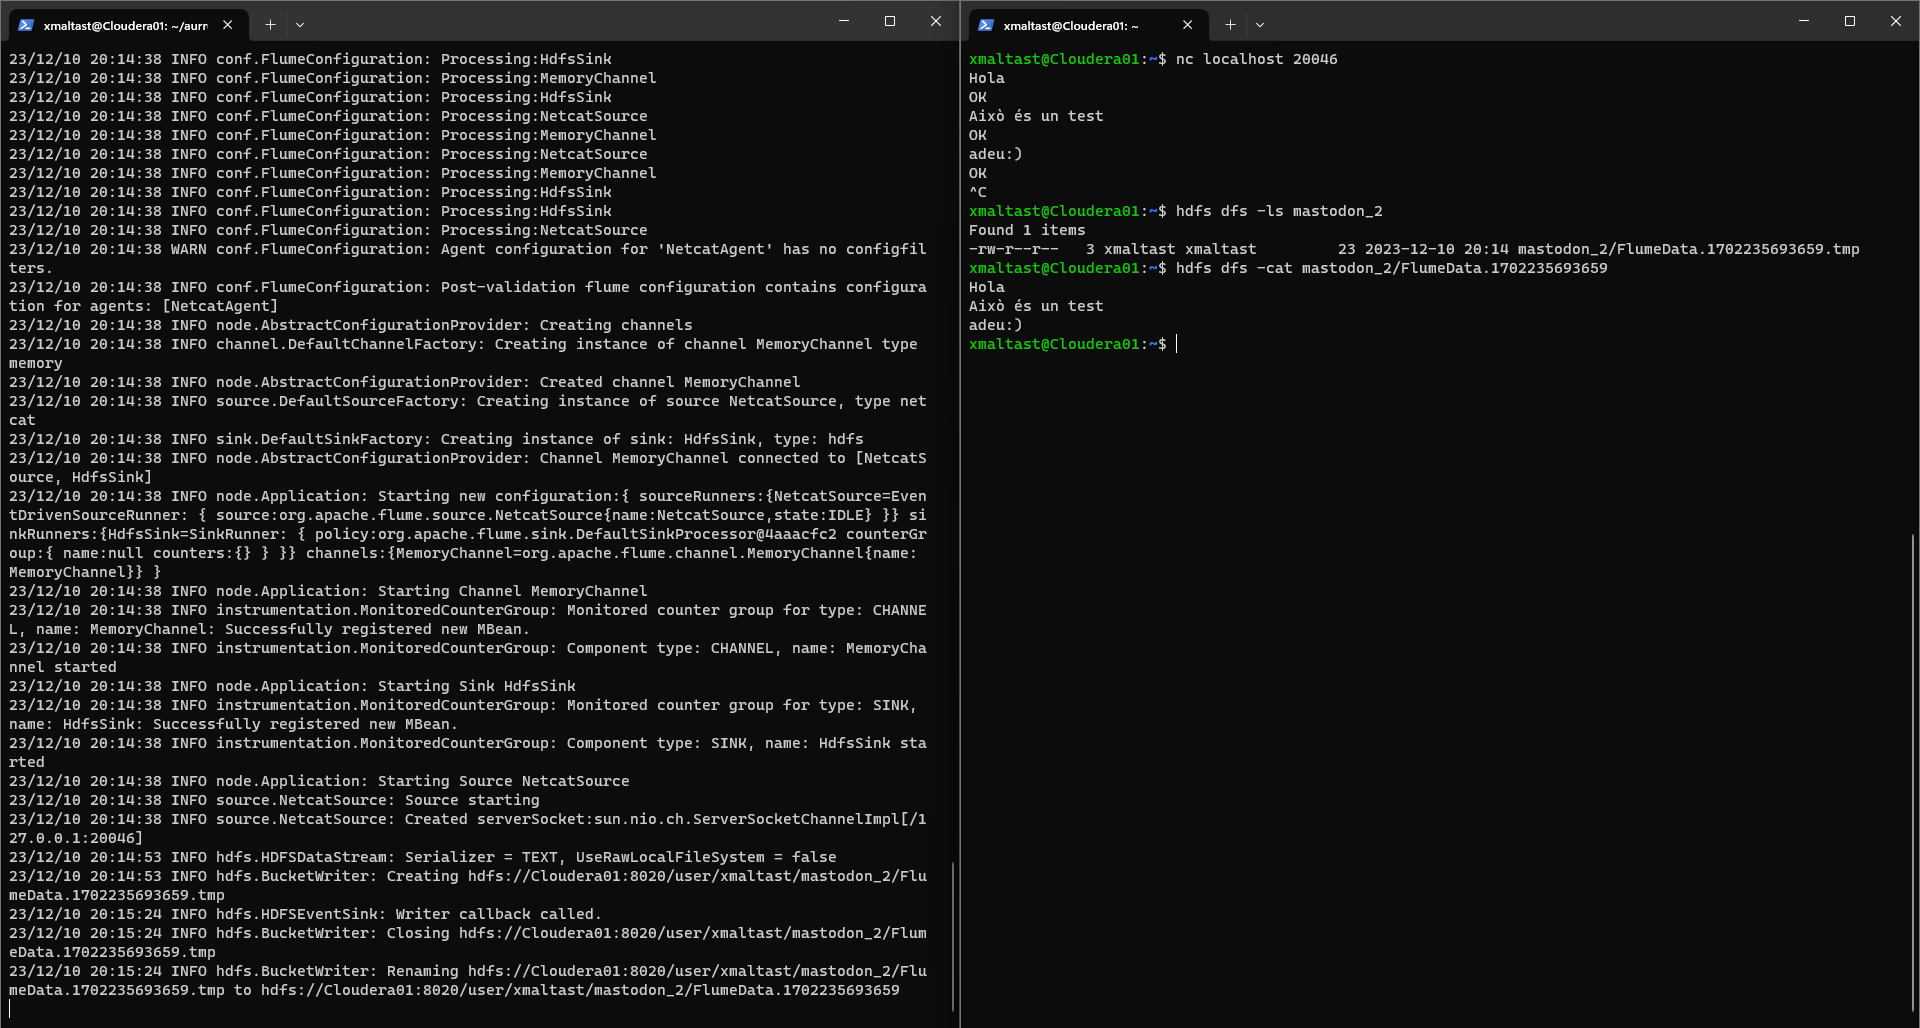

**Pregunta 3. (2 punts)** Registrem a HDFS els "toots" que vas publicant al teu compte de mastodon.social. Per fer-ho, primer has de posar en funcionament el programa shell, run_3.sh, mitjançant la comanda `sh run_3.sh`. Posteriorment, has d'executar el codi d'aquesta cel·la per enviar els "toots" publicats a Flume i que aquest els enregistri. L'esquelet d'aquest programa en Python és un [client de sòcols TCP](https://docs.python.org/3/howto/sockets.html) que envia la informació a un port de Flume que està escoltant. La informació que s'emmagatzema a HDFS té el format d'exemple:

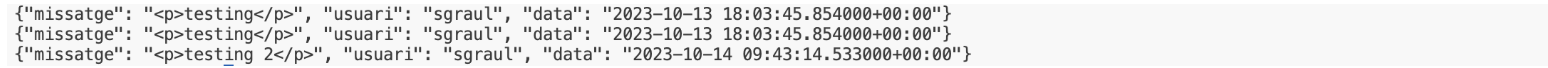

En aquest exercici és necessari configurar correctament l'agent de Flume i completar el programa Python. Cada "toot" s'ha d'emmagatzemar en un únic fitxer de text a Flume a la carpeta `/usuari/<USUARI>/mastodon_4` a HDFS.

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
raise NotImplementedError()
#END <FILL IN>

In [ ]:
#START <FILL IN>

from time import sleep
import socket
import json
from mastodon import Mastodon
from pprint import pprint

my_access_token='BNzHT7-XN8r9KMnEX0SLtXsNSoMyCH7b8aRgqrdlBhU'

api = Mastodon(access_token=my_access_token, api_base_url="https://mastodon.social")

HOST = 'localhost'  # hostname o IP address
PORT = 60000       # puerto socket server

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST, PORT))
while True:
    print('\nEnviant informació a Flume',HOST , PORT)
    try:
        while(True):
            resultats = api.timeline(limit=1)
            json_str = json.dumps(resultats,indent=4,sort_keys=True, default=str)
            json_object = json.loads(json_str)
            
            toot = {
                "missatge": json_object[0]["content"],
                "usuari": json_object[0]["account"]["username"],
                "data": json_object[0]["created_at"]
            }
            t_str = json.dumps(toot, indent=4, sort_keys=True, default=str)
            t = t_str.encode()

            s.send(t)
            s.send(b'\n')
            sleep(10)    
    except socket.error:
        print ('Error .\n\nServidor desconnectat.\n')
        s.close()
#END <FILL IN>

Mostrar la captura de pantalla amb el contingut del fitxer en HDFS resultant de l'execució de l'agent de Flume.

YOUR ANSWER HERE

**Pregunta 4. (1 punt)** En aquest exercici emmagatzemarem tots els "toots" nous que s'obtenen amb el hashtag `war` en un fitxer amb format [AVRO](https://avro.apache.org) cada 10 segons, capturant com a mínim 5 missatges. Avro és un marc de serialització de dades i processat remot orientat a files desenvolupat dins del projecte Hadoop d'Apache. Utilitza un JSON per definir els tipus de dades i protocols, i serialitza les dades en un format binari compacte. Aquest JSON ha de contenir les propietats `usuari`, `missatge` i `data`, amb els camps del "toot" associats. Heu de desar el fitxer amb format avro a `/usuari/<USUARI>/mastodon_4` amb els diversos "toots" capturats. No farem servir cap esquema personalitzat, només tindrem la capçalera per defecte i com a cos el JSON amb les propietats esmentades.

Es demana:

- Adquirir els "toots" de Mastodon amb el hashtag `war` i enviar-los mitjançant el protocol TCP (netcat) a Flume amb el port que teniu assignat.
- Configurar l'agent de Flume per emmagatzemar les dades serialitzades en un JSON.
- Mostrar una captura del fitxer AVRO creat a HDFS i del seu contingut.
- Descarregar de HDFS localment el fitxer AVRO.
- Extreure tota la informació del fitxer generat mitjançant la biblioteca fastavro de Python. Mostrar una captura del fitxer JSON amb la informació extreta mitjançant la cel·la subministrada.

In [ ]:
#START <FILL IN>
from time import sleep
import socket
import json
from mastodon import Mastodon
from pprint import pprint

api = Mastodon(access_token="<FILL IN>", api_base_url="https://mastodon.social")

HOST = 'localhost'  # hostname o IP address
PORT = 60000       # puerto socket server

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST, PORT))
toot_dict_anterior = {}
while True:
    print('\nEnviant informació a Flume',HOST , PORT)
    try:
        while(True):
            resultats = api.timeline_hashtag('war', limit=1)
            json_str = json.dumps(resultats,indent=4,sort_keys=True, default=str)
            json_object = json.loads(json_str)
            # YOUR CODE HERE
            raise NotImplementedError()
            sleep(10)       
    except socket.error:
        print ('Error .\n\nServidor desconnectat.\n')
        s.close()
#END <FILL IN>

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
raise NotImplementedError()
#END <FILL IN>

Mostrar la captura de pantalla amb el contingut del fitxer en HDFS resultant de l'execució de l'agent de Flume.

YOUR ANSWER HERE

In [ ]:
Mostrar la captura de pantalla amb el contingut del fitxer en JSON una vegada descarregat en local

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
raise NotImplementedError()
#END <FILL IN>

YOUR ANSWER HERE